In [36]:
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score, mean_absolute_error, explained_variance_score, r2_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import root_mean_squared_error
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

In [24]:
train = pd.read_csv("train.csv")

X = train.drop(columns=["SalePrice"])
y = train["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 80)
(292, 80)
(1168,)
(292,)


In [43]:
categorical_columns_selector = selector(dtype_include=object)
numerical_columns_selector = selector(dtype_exclude=object)

numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

numerical_imputer = SimpleImputer(strategy='constant', fill_value=0)
categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unavailable')

print(categorical_columns)
print(numerical_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '

In [44]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
numerical_preprocessor = StandardScaler()

categorical_preprocessor = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('one-hot-encoder', OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

numerical_preprocessor = Pipeline(steps=[
    ('imputer', numerical_imputer),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)
])

In [45]:
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',GaussianNB())])

In [46]:
modelo = pipeline.fit(X_train, y_train)
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [52]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [53]:
print(f"RMSE: {test_rmse}")
print(f"MAE: {mae}")
print(f"R²: {test_r2}")

RMSE: 70905.23333345655
MAE: 41606.04452054795
R²: 0.34454520208526696


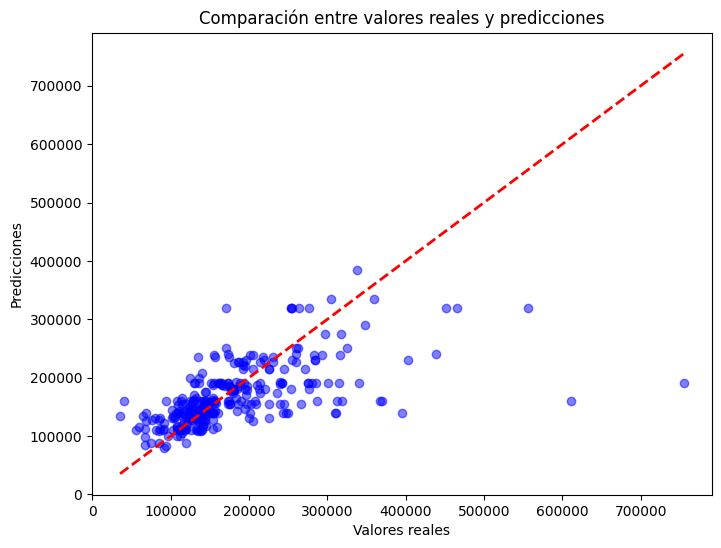

In [49]:
# Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

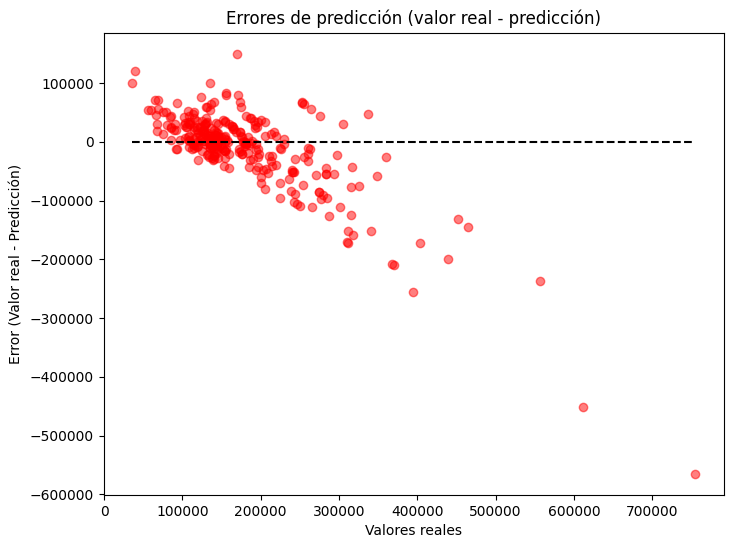

In [50]:
# Gráfico de Errores de Predicción
errores = y_test_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

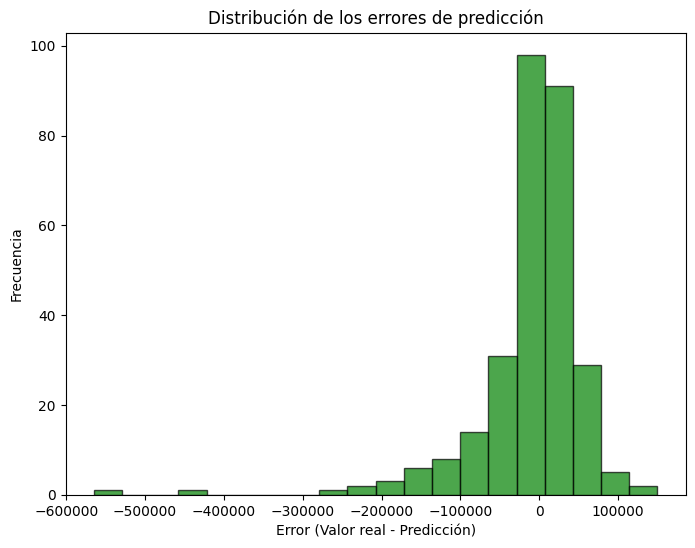

In [51]:
# Histograma de Errores de Predicción
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribución de los errores de predicción")
plt.xlabel("Error (Valor real - Predicción)")
plt.ylabel("Frecuencia")
plt.show()

En las gráficas podemos ver como varían las predicciones del modelo de regresión con Naive Bayes. La primera gráfica muestra una relación entre las predicciones y los valores reales. En esta se puede ver que las predicciones no pasan de los 400000 dolares, pero hay valores reales que si pasan esta medida. Las otras dos gráficas muestran los errores de las predicciones y las frecuencias de los errores, respectivamente. Vemos que ambas muestran una clara tendencia a los negativos, indicando que los valores se subestiman en las predicciones. 

Con los resultados de las métricas podemos ver que el RMSE es de 70905.23 lo que muestra la enorme desviación entre las predicciones y los valores reales. Un número bastante grande y que demuestra la poca eficiencia del modelo. Luego tenemos el MAE que representa lo mismo que el RMSE pero con una penalización menor por los datos atípicos. Este es de 41,606.04 lo cuál sigue siendo una cantidad grande aunque ya no tanto como en el caso anterior. Unir estas dos muestras solo amplifica el hecho de que este modelo es bastante débil en sus predicciones. Por último, tenemos el R² el cual da un aproximado de lo que el modelo explica acerca de la variabilidad en los precios finales de las casas. Este es solamente de 0.3445 o 34.45%, lo cuál es bastante bajo y va de acuerdo con lo visto en las gráficas, pues las predicciones suelen mantenerse en una misma zona.

De los tres modelos de regresión que se han hecho en el proyecto, este es el que peor desempeño ha demostrado. Esto se ve claro al comparar el RMSE y el R² de los tres modelos. El de regresión lineal cuenta con RMSE de 38749.62 y el de árbol en su profundidad más óptima cuenta con un RMSE de 27127.29. Ambos están a más de 40000 dolares de diferencia del RMSE que tiene el modelo de naive bayes. El R² no es la excepción. Para la regresión lineal es de un 76.19% y para el árbol es de un 77.18%, ambos superando el 50% en cuanto a la estimación de la variabilidad de los precios, dejando muy mal parado al naive bayes. 
El fracaso de este último modelo puede ser por diferentes razones. Primero, el modelo de NB asume independencia entre cada una de las variables, por lo que a diferencia de los otros, no puede apoyarse por posibles relaciones que hayan entre los datos. Además, al momento de hacer el análisis de datos descubrimos que el modelo no sigue una distribución normal, lo que también afecta en gran medida a las predicciones de este modelo. Por último, NB es un modelo que está más enfocado en la clasificación que en la regresión, por lo que es normal que llegue a tener fallas en estas situaciones.